## Исследование на определение перспективного тарифа для телеком компании

Заказчик исследования «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются в распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### План исследования
#### Шаг 1. Откроем файлы с данными и изучим общую информацию

#### Шаг 2. Подготовка данных
- Приведем данные к нужным типам;
- Исправим ошибки в данных.

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя 

#### Шаг 3. Анализ данных
Описать поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитать среднее количество, дисперсию и стандартное отклонение
- Построить гистограммы, описать распределения

#### Шаг 4. Проверить гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

#### Шаг 5. Общий вывод

### Описание тарифов
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

### Описание данных

#### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

#### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

---

### Шаг 1. Откроем файлы с данными и изучим общую информацию


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime

In [2]:
#загрузим датасет с данными по абонентам
users_data = pd.read_csv('/datasets/users.csv')
users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
#просмотрим инфо таблицы по абонентам
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
#загрузим датасет с данными по звонкам
calls_data = pd.read_csv('/datasets/calls.csv')
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
#просмотрим инфо по звонкам
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
#загрузим датасет с данными по сообщениям
messages_data = pd.read_csv('/datasets/messages.csv')
messages_data.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
#посмотрим инфо по сообщениям
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
#загрузим датасет с данными по тарифам
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
tariffs_data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
#просмотрим инфо по данным с тарифами
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
#загрузим датасет с данными по интернет-трафику
internet_data = pd.read_csv('/datasets/internet.csv')
internet_data.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [11]:
#просмотрим инфо по данным с интернет-трафиком
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Вывод

Таблицы содержат информацию по абонентам, звонкам, сообщениям, трафику и тарифам. 

Из описания проекта мы знаем, что "Мегалайн" всегда округляет вверх значения минут и мегабайтов. Значит соответствующие столбцы со значениями нужно округлить вверх.

Таблица users_data содержит пропуски в столбце churn_date — дата прекращения пользования тарифом, что означает тариф ещё действовал на момент выгрузки данных. В столбцах churn_date и reg_date нужно будет поменять тип данных с object на datetime.

Таблица calls_data в столбце duration — длительность звонка в минутах, имеет множество записей с длительностью звонка 0.0 минут, вероятно так в данных обозначаются пропущенные вызовы, т.к. за звонки с нулевой длительностью не взимается плата, они не интересны нам для анализа и их можно удалить. Так же к столбцу duration нужно применить метод np.ceil(), чтобы округлить данные вверх. В столбце call_date нужно заменить тип данных с с object на datetime.

Таблица messages_data в столбце message_date нужно заменить тип данных с с object на datetime.

В таблице internet_data есть столбец Unnamed: 0, который скорее всего является дубликатом индексов, он не несет полезной информации, нужно удалить. В столбце session_date нужно заменить тип данных с с object на datetime. К столбцу mb_used нужно применить метод np.ceil(), чтобы округлить данные вверх.



---

### Шаг 2. Подготовка данных

#### Приведем данные к нужным типам

In [12]:
#В столбце call_date поменяем тип данных с object на datetime
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y.%m.%d')

In [13]:
#В столбце session_date поменяем тип данных с object на datetime
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y.%m.%d')

In [14]:
#В столбце reg_date поменяем тип данных с object на datetime
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y.%m.%d')

In [15]:
#В столбце churn_date поменяем тип данных с object на datetime
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y.%m.%d')

In [16]:
#В столбце message_date поменяем тип данных с object на datetime
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y.%m.%d')

#### Округлим данные вверх

In [17]:
#В таблице calls_data к столбцу duration применим метод np.ceil() и переведем тип данных из float в int
calls_data['duration'] = calls_data['duration'].apply(np.ceil).astype('int')

In [18]:
#В таблице internet_data к столбцу mb_used применим метод np.ceil() и переведем тип данных из float в int
internet_data['mb_used'] = internet_data['mb_used'].apply(np.ceil).astype('int')
tariffs_data['mb_per_month_included'] = tariffs_data['mb_per_month_included'].apply(np.ceil).astype('int')

In [19]:
internet_data.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


#### Удалим лишние данные

In [20]:
#удалим из таблицы calls_data нулевые данные из столбца duration
calls_data.drop(index = calls_data[calls_data['duration']==0.00].index, inplace = True )

In [21]:
#удалим столбец Unnamed: 0 из таблицы internet_data
internet_data.drop('Unnamed: 0', axis=1, inplace=True)

#### Создадим новые столбцы 

In [22]:
#создадим новый столбец month где будет указан месяц записи
messages_data['month'] = messages_data['message_date'].dt.month
messages_data.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [23]:
#создадим новый столбец month где будет указан месяц записи
internet_data['month'] = internet_data['session_date'].dt.month
internet_data.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [24]:
#создадим новый столбец month где будет указан месяц записи
calls_data['month'] = calls_data['call_date'].dt.month
calls_data.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9


#### Посчитаем количество минут разговора, сообщений и интернет-трафика по месяцам

In [25]:
#посчитаем длительность звонков от всех пользователей за каждый месяц
calls_by_user = calls_data.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index().rename(columns={'duration':'calls_per_month'})
calls_by_user

,user_id,month,calls_per_month
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3163,1498,10,247
3164,1499,9,70
3165,1499,10,449
3166,1499,11,612


In [26]:
#посчитаем количество сообщений от всех пользователей за каждый месяц
messages_by_user = messages_data.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'messages_per_month'})
messages_by_user.head()

,user_id,month,messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [27]:
#посчитаем объем траффика от всех пользователей за каждый месяц
internet_by_user = internet_data.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index().rename(columns={'mb_used':'mb_per_month'})
internet_by_user.head()

,user_id,month,mb_per_month
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [28]:
#объединим получившиеся три таблицы в одну, с помощью метода merge()
data_per_month = calls_by_user.merge(messages_by_user, on=['user_id', 'month'], how='outer').merge(internet_by_user, on=['user_id', 'month'], how='outer')
data_per_month.head()

,user_id,month,calls_per_month,messages_per_month,mb_per_month
0,1000,5,159.0,22.0,2256.0
1,1000,6,172.0,60.0,23257.0
2,1000,7,340.0,75.0,14016.0
3,1000,8,408.0,81.0,14070.0
4,1000,9,466.0,57.0,14581.0


In [29]:
#добавим к таблице data_per_month данные по юзерам
data_per_month = data_per_month.merge(users_data, on='user_id', how='left')
data_per_month.head()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [30]:
#чтобы добавить к таблице data_per_month данные по тарифам, нужно переименовать столбец tariff_name в tariff
tariffs_data = tariffs_data.rename(columns={'tariff_name':'tariff'})

In [31]:
#отключим дефолтное ограничение количества столбцов, чтобы была видна вся таблица
pd.set_option('display.max_columns', None)
#добавим к таблице data_per_month данные по тарифам
data_per_month = data_per_month.merge(tariffs_data, on='tariff', how='left')
data_per_month.head(10)

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,350.0,73.0,14717.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,338.0,58.0,14768.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,333.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,430.0,NaN,18452.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
9,1001,12,414.0,NaN,14053.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


In [32]:
#некоторые пользователи могли не использовать звонки, смс, или интернет-трафик, проверим на пропуски
data_per_month.isnull().sum()

user_id                     0
month                       0
calls_per_month            46
messages_per_month        497
mb_per_month               11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [33]:
#проставим нули вместо пропусков
data_per_month['calls_per_month'] = data_per_month['calls_per_month'].fillna(0)
data_per_month['messages_per_month'] = data_per_month['messages_per_month'].fillna(0)
data_per_month['mb_per_month'] = data_per_month['mb_per_month'].fillna(0)

In [34]:
data_per_month.head(10)

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,350.0,73.0,14717.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,338.0,58.0,14768.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,333.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,430.0,0.0,18452.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
9,1001,12,414.0,0.0,14053.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


#### Посчитаем помесячную выручку с каждого пользователя

In [35]:
data_per_month.head()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [36]:
tariff_df = pd.read_csv('/datasets/tariffs.csv',index_col = 'tariff_name')
 

In [37]:
#напишем функцию для подсчета выручки с каждого пользователя
def users_benefits(row, tariffs = tariff_df): #на вход устанавливаем строку и обращаемся к таблице tariffs
    #создаем переменные с данными о продолжительности звонков, количестве сообщений, объеме израсходованного трафика и названии тарифа
    short_min = row['calls_per_month']
    short_message = row['messages_per_month']
    short_internet = row['mb_per_month']
    tariff = row['tariff']
   
    #создаем переменные с данными о лимите звонков, сообщений и интернет-трафике в соответствии с тарифом
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    mess_lim = tariffs.loc[tariff, 'messages_included']
    inter_lim = tariffs.loc[tariff, 'mb_per_month_included']
   
    #посчитаем переплату по тарифному плану для каждой категории
    call_overlimit = max(short_min - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariff, 'rub_per_minute']
   
    messages_overlimit = max(short_message - mess_lim, 0)
    messages_overpay = messages_overlimit * tariffs.loc[tariff, 'rub_per_message']
   
    internet_overlimit = max(short_internet - inter_lim, 0)
    internet_overpay = internet_overlimit * tariffs.loc[tariff, 'rub_per_gb'] / 1024
   
    #подсчитаем выручку с каждого пользователя                      
    profit = call_overpay + messages_overpay + internet_overpay + tariffs.loc[tariff, 'rub_monthly_fee']
    return profit
   
#создаю новый столбец 'profit' в таблице new_table с данными о выручке с каждого пользователя
data_per_month['profit'] = data_per_month[['tariff', 'calls_per_month', 'mb_per_month', 'messages_per_month']].apply(users_benefits, axis = 1)

In [38]:
data_per_month.tail()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
3209,1489,10,0.0,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1375.781250
3210,1489,11,0.0,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,971.093750
3211,1489,12,0.0,35.0,17341.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,936.914062
3212,1240,2,0.0,0.0,961.0,30,NaT,Воронеж,Зинаида,Шарова,2018-02-27,ultra,1000,30720,3000,1950,150,1,1,1950.000000
3213,1476,4,0.0,0.0,531.0,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1,1950.000000


In [39]:
#посмотрим сколько абонентов используют тариф смарт и сколько на ультре
data_per_month['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

### Вывод

Пропусков и дубликатов в таблицах не обнаружено.

Удалили нулевые значения по столбцу duration из таблицы calls_data.
Удалили лишний столбец Unnamed: 0 из таблицы internet_data.

Поменяли тип данных в столбцах reg_date, churn_date, message_date, session_date с object на datetime. 

Создали в таблице по звонкам, смс и интернет-трафику по столбцу month, где указан номер месяца.

Посчитали количество минут разговора, сообщений и интернет-трафика по месяцам.

Объединили получившиеся таблицы в одну и заполнили пропуски, т.к. не все абоненты использовали звонки, смс и интернет-траффик.

Посчитали выручку с каждого абонента и занесли эти данные в новый столбец profit.


---

### Шаг 3. Анализ данных

#### Посчитаем сколько минут разговора, сообщений и трафика нужно пользователям в месяц на каждом тарифе

In [40]:
#сохраним срезы по тарифам в отдельные переменные
smart = data_per_month.query('tariff == "smart"')
ultra = data_per_month.query('tariff == "ultra"')

In [41]:
#посторим сводную таблицу где подсчитаем сколько минут разговора, сообщений и объем интернет-трафика
#требуется пользователям каждого тарифа в месяц
stat_month = data_per_month.pivot_table(index='month', columns = 'tariff', values=['calls_per_month', 'messages_per_month', 'mb_per_month'], aggfunc='sum')
stat_month

calls_per_month          mb_per_month            messages_per_month  \
tariff           smart    ultra        smart      ultra              smart   
month                                                                        
1               6931.0   3853.0     289831.0   118382.0              620.0   
2              17324.0   7131.0     673461.0   282887.0             1397.0   
3              30034.0  18117.0    1164537.0   649423.0             2453.0   
4              41119.0  25191.0    1509702.0   926409.0             3443.0   
5              54618.0  34192.0    2231353.0  1298540.0             4762.0   
6              64885.0  40295.0    2593622.0  1591148.0             5478.0   
7              82079.0  49667.0    3168466.0  1866833.0             6784.0   
8              99045.0  54653.0    3908561.0  2096565.0             7905.0   
9             111439.0  62036.0    4244377.0  2210554.0             8746.0   
10            125284.0  68644.0    4932898.0  2467856.0             9927.0   
11            137544.0  72545.0    5345940.0  2653912.0            10768.0   
12            161275.0  82400.0    6112113.0  3032089.0            12130.0   

                
tariff   ultra  
month           
1        304.0  
2        527.0  
3       1195.0  
4       1736.0  
5       2536.0  
6       3505.0  
7       4536.0  
8       5183.0  
9       6013.0  
10      7187.0  
11      7476.0  
12      8425.0

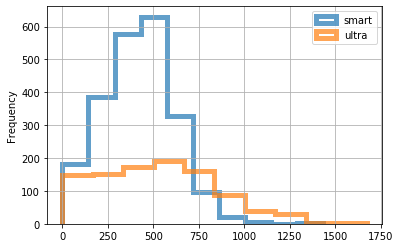

In [42]:
#построим гистограмму по звонкам в месяц для обоих тарифов
ax = smart.plot(kind='hist', y='calls_per_month', histtype='step', bins=10, linewidth=5, alpha=0.7, label='smart')
ultra.plot(kind='hist', y='calls_per_month', histtype='step', bins=10, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True)


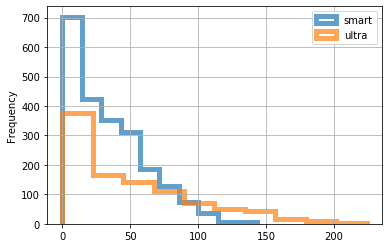

In [43]:
#построим гистограмму по сообщениям в месяц для обоих тарифов
ax = smart.plot(kind='hist', y='messages_per_month', histtype='step', bins=10, linewidth=5, alpha=0.7, label='smart')
ultra.plot(kind='hist', y='messages_per_month', histtype='step', bins=10, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True)


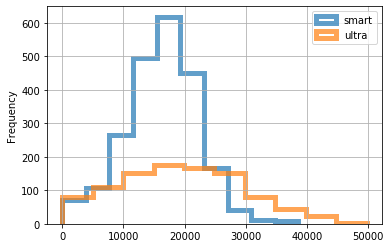

In [44]:
#построим гистограмму по интернет-трафику в месяц для обоих тарифов
ax = smart.plot(kind='hist', y='mb_per_month', histtype='step', bins=10, linewidth=5, alpha=0.7, label='smart')
ultra.plot(kind='hist', y='mb_per_month', histtype='step', bins=10, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True)


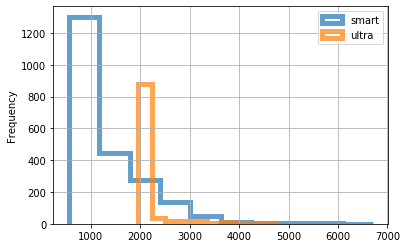

In [45]:
#построим гистограмму по выручке в месяц для обоих тарифов
ax = smart.plot(kind='hist', y='profit', histtype='step', bins=10, linewidth=5, alpha=0.7, label='smart')
ultra.plot(kind='hist', y='profit', histtype='step', bins=10, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True)


#### Посчитаем среднее, дисперсию и стандартное отклонение для каждого тарифа

In [46]:
#создадим сводную таблицу, где будут указаны среднее, дисперсия и стандартное отклонение для каждого тарифа
#lambda - это дисперсия в данной таблице

data_per_month.pivot_table(columns = 'tariff',
                          values = ['calls_per_month', 'messages_per_month', 'mb_per_month'],
                          aggfunc = ['mean', lambda x: np.var(x, ddof=0), np.std])

mean                    <lambda>                \
tariff                     smart         ultra         smart         ultra   
calls_per_month       417.934948    526.623350  3.620307e+04  1.007712e+05   
mb_per_month        16229.188425  19486.901523  3.453041e+07  1.018321e+08   
messages_per_month     33.384029     49.363452  7.964555e+02  2.282946e+03   

                            std                
tariff                    smart         ultra  
calls_per_month      190.313730    317.606098  
mb_per_month        5877.576978  10096.317202  
messages_per_month    28.227876     47.804457

In [47]:
#просмотрим данные по тарифу ultra
ultra.describe()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,526.623350,49.363452,19486.901523,46.834518,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2060.529971
std,140.694908,2.871762,317.606098,47.804457,10096.317202,17.107979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.305046
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,284.000000,6.000000,11785.000000,30.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,19324.000000,45.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,752.000000,79.000000,26863.000000,63.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,1673.000000,224.000000,49789.000000,75.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4743.310547


In [48]:
#просмотрим данные по тарифу smart
smart.describe()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,417.934948,33.384029,16229.188425,46.556303,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1233.349467
std,146.119496,2.920316,190.313730,28.227876,5877.576978,16.353371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,787.688141
min,1001.000000,1.000000,0.000000,0.000000,0.000000,18.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,12658.000000,32.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1239.000000,9.000000,422.000000,28.000000,16531.000000,47.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,959.898438
75%,1376.000000,11.000000,545.000000,51.000000,20068.000000,62.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1668.117188
max,1499.000000,12.000000,1435.000000,143.000000,38610.000000,75.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6711.015625


### Вывод
Звонки:
- Абоненты тарифа Смарт в среднем не выходят за рамки тарифа и используют 417 минут разговоров в месяц
- Абоненты тарифа Ультра в среднем разговаривают 526 минут, включенных в тариф 3000 минут явно слишком много, максимальное количество потраченных минут всего 1673.

Сообщения:
- Абоненты тарифа Смарт пользуются сообщениями довольно редко, в среднем всего 33 сообщения за месяц, таким образом 50 включенных в тариф сообщений для абонентов в самый раз.
- Абоненты тарифа Ультра так же не особо часто пишут смс, в среднем всего 49 за месяц, 1000 сообщений в тарифе явно перебор.

Интернет-трафик:
- Абоненты тарифа Смарт в среднем используют 16229мб в месяц, что в Гб будет 15,84Гб, немного превышают отведенный на тариф 15гб
- Абоненты тарифа Ультра в среднем используют немного больше трафика, 19,02Гб в месяц, что с большим запасом укладывается в их тариф на 30Гб интернет-трафика.

Выручка:
- средняя выручка по тарифу Смарт 1233 рубля в месяц с каждого абонента.
- средняя выручка по тарифу Ультра 2060 рубля в месяц с каждого абонента.

### Шаг 4. Проверить гипотезы

### Гипотезы:

H0 - общая выручка от абонентов тарифов Ультра и Смарт одинаковая

H1 - общая выручка от абонентов тарифов Ультра и Смарт различается

Для проверки гипотез будем использовать Т-критерий Стьюдента, потому что выборки независимы друг от друга и имеют нормальное распределение.

Значение альфа = 0.05

In [49]:
ultra = ultra['profit']
smart = smart['profit']

In [50]:
alpha = 0.05

In [51]:
results = st.ttest_ind(smart, ultra)

In [52]:
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.172655564462924e-190
Отвергаем нулевую гипотезу


### Вывод
В результате анализа выяснилось, что выручка на тарифах Смарт и Ультра все же разная и разница не случайна.

- - -

### Гипотезы:

H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотез будем использовать Т-критерий Стьюдента, потому что выборки независимы друг от друга и имеют нормальное распределение.

Значение альфа = 0.05

In [53]:
#определим срез данных где город Москва в переменную moscow
moscow = data_per_month[data_per_month['city'] == 'Москва']
moscow.head()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
8,1001,11,430.0,0.0,18452.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,1153.90625
9,1001,12,414.0,0.0,14053.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,550.00000
17,1003,8,380.0,37.0,8571.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.00000
18,1003,9,961.0,91.0,12479.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.00000
19,1003,10,855.0,83.0,14779.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.00000


In [54]:
#все остальные города определим в переменную other_city
other_city = data_per_month[data_per_month['city'] != 'Москва']
other_city.head()

,user_id,month,calls_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [55]:
moscow = moscow['profit']
other_city = other_city['profit']

In [56]:
results = st.ttest_ind(moscow, other_city)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


### Вывод
В результате анализа выяснилось, что выручка в Москве не отличается от других городов.

### Шаг 5. Общий вывод


Абоненты тарифа Ультра крайне редко выходят за пределы включенных в тариф звонков, сообщений и интернет-траффика, более того, остается с большим запасом. Возможно стоит пересмотреть лимиты по звонкам и особенно по  сообщениям в меньшую сторону, потому что с точки зрения абонента он переплачивает за то, чем не пользуется и может захотеть перейти к другому, более выгодному для него оператору. 

Абоненты тарифа Смарт чаще выходят за пределы тарифа, что логично, т.к. у них лимиты по звонкам, сообщениям и трафику значительно ниже, чем у Ультры.

В результате проведенного исследования, можно сделать вывод, что тариф Смарт наиболее перспективен для развития, как для оператора, так и для абонента. Ультра слишком дорогой по сравнения со Смартом, имеет слишком большие и ненужные абоненту лимиты по звонкам и сообщениям. А учитывая что в среднем, абоненты не используют больше 19Гб трафика в месяц, то и переплачивать за лимит в 30Гб для абонента скорее всего не будет иметь смысла.